# Hackathon Ficohsa 2021 - Data Analytics

En este notebook detallaremos el procedimiento realizado en Python para poder segmentar a los clientes acorde a sus comportamientos de gastos. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
df_clientes = pd.read_csv('CLIENTES_CSV')
df_transacciones = pd.read_csv('TRANSACCIONES_CSV', encoding = 'latin-1')
print('Dataframes creados éxitosamente')

Dataframes creados éxitosamente


## Exploración de dataset de Clientes

In [3]:
df_clientes.head()

,CODIGO_CLIENTE,SEGMENTO,EDAD,GENERO
0,10219832,CLASICO,65,MASCULINO
1,7853744,CLASICO,36,FEMENINO
2,7855108,CLASICO,42,FEMENINO
3,7860671,CLASICO,36,MASCULINO
4,7985606,CLASICO,61,FEMENINO


In [4]:
df_clientes.count()


CODIGO_CLIENTE    361835
SEGMENTO          361835
EDAD              361835
GENERO            361835
dtype: int64

In [5]:
df_clientes.isnull().sum()

CODIGO_CLIENTE    0
SEGMENTO          0
EDAD              0
GENERO            0
dtype: int64

In [6]:
df_clientes.set_index('CODIGO_CLIENTE', inplace = True)

In [7]:
df_clientes.describe()

,EDAD
count,361835.000000
mean,36.551464
std,12.722365
min,0.000000
25%,26.000000
50%,34.000000
75%,44.000000
max,141.000000


In [8]:
df_clientes['SEGMENTO'].unique()

array(['CLASICO', 'PLATINO', 'ORO', 'ESPECIAL'], dtype=object)

<AxesSubplot:xlabel='EDAD', ylabel='Density'>

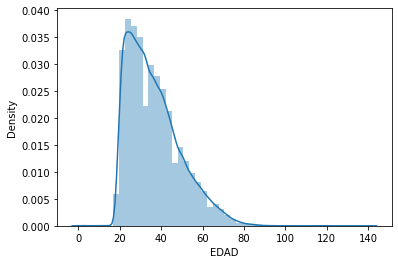

In [9]:
sns.distplot(df_clientes['EDAD'])

In [10]:
df_clientes['EDAD'].skew()

0.8999915573951883

In [11]:
df_clientes['SEGMENTO'] = df_clientes['SEGMENTO'].map({'CLASICO': 1, 'PLATINO':3,'ORO':2, 'ESPECIAL':4})
df_clientes['GENERO'] = df_clientes['GENERO'].map({'MASCULINO': 0, 'FEMENINO':1})

In [12]:
df_clientes.head()

,SEGMENTO,EDAD,GENERO
CODIGO_CLIENTE,,,
10219832,1,65,0
7853744,1,36,1
7855108,1,42,1
7860671,1,36,0
7985606,1,61,1


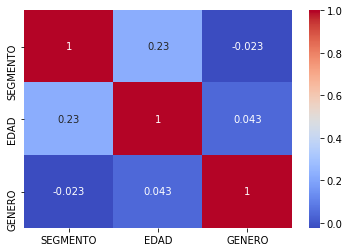

In [13]:
sns.heatmap(df_clientes.corr(), annot = True, cmap = 'coolwarm')
df_clientes.to_csv('CLIENTES.csv')

In [14]:
df_clientes['EDAD'] = df_clientes['EDAD'].map(lambda x: np.log(x) if x > 0 else 0)

<AxesSubplot:xlabel='EDAD', ylabel='Density'>

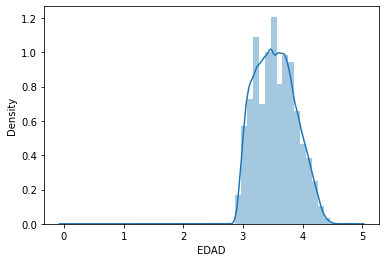

In [15]:
sns.distplot(df_clientes['EDAD'])

In [16]:
df_clientes['EDAD'].skew()

0.16542547282058642

## Exploración de dataset de transacciones

In [17]:
df_transacciones.head()

,CODIGO_CLIENTE,DESCRIPCION_BIN,FECHA_TRANSACCION,TIPO_TARJETA,DESCRIPCION_MCC,MONEDA,MONTO
0,9158663,CLASICA,23-JUL-21,TC,GASOLINERAS,340 - Lempira,206.72
1,7985561,PLATINUM,11-SEP-21,TC,BODEGAS DE SUMINISTROS PARA EL HOGAR,840 - Dolar,46.80
2,8034303,SIGNATURE,30-JUL-21,TC,GRUPOS DE CARIDAD,340 - Lempira,21960.00
3,9119840,ORO,09-AUG-21,TC,SUPERMERCADOS,340 - Lempira,792.79
4,8822651,CLASICA,14-SEP-21,TC,GASOLINERAS,340 - Lempira,1480.20


In [18]:
df_transacciones.dtypes

CODIGO_CLIENTE         int64
DESCRIPCION_BIN       object
FECHA_TRANSACCION     object
TIPO_TARJETA          object
DESCRIPCION_MCC       object
MONEDA                object
MONTO                float64
dtype: object

In [19]:
df_transacciones.isnull().sum()

CODIGO_CLIENTE          0
DESCRIPCION_BIN      2142
FECHA_TRANSACCION       0
TIPO_TARJETA            0
DESCRIPCION_MCC         0
MONEDA                  0
MONTO                   1
dtype: int64

In [20]:
df_transacciones.count()

CODIGO_CLIENTE       2465898
DESCRIPCION_BIN      2463756
FECHA_TRANSACCION    2465898
TIPO_TARJETA         2465898
DESCRIPCION_MCC      2465898
MONEDA               2465898
MONTO                2465897
dtype: int64

In [21]:
moda_descripcion = df_transacciones['DESCRIPCION_BIN'].dropna().mode()[0]
moda_descripcion

'CLASICA'

In [22]:
df_transacciones['DESCRIPCION_BIN'].fillna(moda_descripcion, inplace = True)

In [23]:
df_transacciones.isnull().sum()

CODIGO_CLIENTE       0
DESCRIPCION_BIN      0
FECHA_TRANSACCION    0
TIPO_TARJETA         0
DESCRIPCION_MCC      0
MONEDA               0
MONTO                1
dtype: int64

In [24]:
df_transacciones.dropna(axis = 0, inplace = True)
df_transacciones.isnull().sum()

CODIGO_CLIENTE       0
DESCRIPCION_BIN      0
FECHA_TRANSACCION    0
TIPO_TARJETA         0
DESCRIPCION_MCC      0
MONEDA               0
MONTO                0
dtype: int64

In [25]:
df_transacciones.count()

CODIGO_CLIENTE       2465897
DESCRIPCION_BIN      2465897
FECHA_TRANSACCION    2465897
TIPO_TARJETA         2465897
DESCRIPCION_MCC      2465897
MONEDA               2465897
MONTO                2465897
dtype: int64

In [26]:
df_transacciones['DESCRIPCION_BIN'].unique()

array(['CLASICA', 'PLATINUM', 'SIGNATURE', 'ORO', 'ORO INTERNACIONAL',
       'INFINITE', 'VISA CLASICA INTERNACIONAL', 'CLASICA LOCAL',
       'VISA PLATINUM', 'CLASSIC INTERNACIONAL 2', 'GOLD 2',
       'STANDARD MC', 'VISA GOLD INTERNACIONAL', 'STANDARD', 'MC BLACK',
       'VISA CLASICA', 'GOLD MC', 'BUSINESS', 'CLASICA CON CHIP', 'PLAN',
       'FICOHSA REMESAS', 'CLASICO DISFRUTA MAS', 'ORO VISA DEBITO',
       'CLICK', 'TD FICOHSA PLATINUM', 'VISA INFINITE DEBITO',
       'TARJETA DEBITO UNITEC', 'TARJETA DEBITO PYME', 'CORPORATE',
       'MP CLASSIC', 'GLOBAL VISA DEBITO'], dtype=object)

En esta instancia, 1 representa Clásica, 2 representa Oro, 3 representa Platinum, 4 representa Otro tipo

In [27]:
df_transacciones['DESCRIPCION_BIN'] = df_transacciones['DESCRIPCION_BIN'].map({'CLASICA':1, 'PLATINUM': 3, 'SIGNATURE': 4, 'ORO':2, 
                                                            'ORO INTERNACIONAL': 2, 'INFINITE': 4, 'VISA CLASICA INTERNACIONAL': 1, 
                                                            'CLASICA LOCAL': 1, 'VISA PLATINUM': 3, 'CLASSIC INTERNACIONAL 2': 1,
                                                           'GOLD 2': 2, 'STANDARD MC': 1, 'VISA GOLD INTERNACIONAL': 2, 
                                                           'STANDARD': 1, 'MC BLACK': 3, 'VISA CLASICA': 1, 'GOLD MC': 2, 
                                                           'BUSINESS': 4, 'CLASICA CON CHIP': 1, 'PLAN': 4, 'FICOHSA REMESAS': 4,
                                                           'CLASICO DISFRUTA MAS': 1, 'ORO VISA DEBITO': 2, 'CLICK': 4,
                                                           'TD FICOHSA PLATINUM': 3, 'VISA INFINITE DEBITO': 4, 
                                                           'TARJETA DEBITO UNITEC': 4, 'TARJETA DEBITO PYME': 4, 'CORPORATE': 4,
                                                           'MP CLASSIC': 1, 'GLOBAL VISA DEBITO': 4})

In [28]:
df_transacciones['DESCRIPCION_BIN'].unique()

array([1, 3, 4, 2], dtype=int64)

In [29]:
df_transacciones['TIPO_TARJETA'].unique()

array(['TC', 'TD'], dtype=object)

In [30]:
df_transacciones['TIPO_TARJETA'] = df_transacciones['TIPO_TARJETA'].map({'TD':0,'TC':1})

In [31]:
 df_transacciones['TIPO_TARJETA'].unique()

array([1, 0], dtype=int64)

In [32]:
df_transacciones['MONEDA'].unique()

array(['340 - Lempira', '840 - Dolar'], dtype=object)

En este caso convertimos la moneda de lempira como 1, y la moneda de dolar como 2

In [33]:
df_transacciones['MONEDA'] = df_transacciones['MONEDA'].map({'340 - Lempira': 1, '840 - Dolar': 2})

In [34]:
df_transacciones['MONEDA'].unique()

array([1, 2], dtype=int64)

In [35]:
df_transacciones['CODIGO_CLIENTE'].nunique()

202510

In [36]:
df_transacciones.dtypes

CODIGO_CLIENTE         int64
DESCRIPCION_BIN        int64
FECHA_TRANSACCION     object
TIPO_TARJETA           int64
DESCRIPCION_MCC       object
MONEDA                 int64
MONTO                float64
dtype: object

In [37]:
df_transacciones['FECHA_TRANSACCION'] = pd.to_datetime(df_transacciones['FECHA_TRANSACCION'], infer_datetime_format=True)

In [38]:
df_transacciones.head()

,CODIGO_CLIENTE,DESCRIPCION_BIN,FECHA_TRANSACCION,TIPO_TARJETA,DESCRIPCION_MCC,MONEDA,MONTO
0,9158663,1,2021-07-23,1,GASOLINERAS,1,206.72
1,7985561,3,2021-09-11,1,BODEGAS DE SUMINISTROS PARA EL HOGAR,2,46.80
2,8034303,4,2021-07-30,1,GRUPOS DE CARIDAD,1,21960.00
3,9119840,2,2021-08-09,1,SUPERMERCADOS,1,792.79
4,8822651,1,2021-09-14,1,GASOLINERAS,1,1480.20


In [39]:
df_transacciones.dtypes

CODIGO_CLIENTE                int64
DESCRIPCION_BIN               int64
FECHA_TRANSACCION    datetime64[ns]
TIPO_TARJETA                  int64
DESCRIPCION_MCC              object
MONEDA                        int64
MONTO                       float64
dtype: object

In [40]:
df_transacciones['DIA_TRANSACCION'] = df_transacciones['FECHA_TRANSACCION'].dt.day
df_transacciones['SEMANA_TRANSACCION'] = df_transacciones['FECHA_TRANSACCION'].dt.week
df_transacciones['MES_TRANSACCION'] = df_transacciones['FECHA_TRANSACCION'].dt.month
df_transacciones['AÑO_TRANSACCION'] = df_transacciones['FECHA_TRANSACCION'].dt.year
df_transacciones['DIADESEMANA_TRANSACCION'] = df_transacciones['FECHA_TRANSACCION'].dt.dayofweek


En este caso, Dia de semana representa 0 el domingo, 1 el lunes, 2 el martes y asi consecutivamente. 

In [41]:
df_transacciones.head()

,CODIGO_CLIENTE,DESCRIPCION_BIN,FECHA_TRANSACCION,TIPO_TARJETA,DESCRIPCION_MCC,MONEDA,MONTO,DIA_TRANSACCION,SEMANA_TRANSACCION,MES_TRANSACCION,AÑO_TRANSACCION,DIADESEMANA_TRANSACCION
0,9158663,1,2021-07-23,1,GASOLINERAS,1,206.72,23,29,7,2021,4
1,7985561,3,2021-09-11,1,BODEGAS DE SUMINISTROS PARA EL HOGAR,2,46.80,11,36,9,2021,5
2,8034303,4,2021-07-30,1,GRUPOS DE CARIDAD,1,21960.00,30,30,7,2021,4
3,9119840,2,2021-08-09,1,SUPERMERCADOS,1,792.79,9,32,8,2021,0
4,8822651,1,2021-09-14,1,GASOLINERAS,1,1480.20,14,37,9,2021,1


In [42]:
df_transacciones.dtypes

CODIGO_CLIENTE                      int64
DESCRIPCION_BIN                     int64
FECHA_TRANSACCION          datetime64[ns]
TIPO_TARJETA                        int64
DESCRIPCION_MCC                    object
MONEDA                              int64
MONTO                             float64
DIA_TRANSACCION                     int64
SEMANA_TRANSACCION                  int64
MES_TRANSACCION                     int64
AÑO_TRANSACCION                     int64
DIADESEMANA_TRANSACCION             int64
dtype: object

In [43]:
df_transacciones.drop('FECHA_TRANSACCION', axis = 1, inplace = True)

In [44]:
df_transacciones['DESCRIPCION_MCC'].unique()
df_transacciones['DESCRIPCION_MCC'] = df_transacciones['DESCRIPCION_MCC'].str.strip()

Aqui hacemos hot encoding de la descripción del MCC, clasificándolo en una a 6 categorías, dependiendo del tipo de consumo que fue.
1 - Salud
2 - Comercio de consumo
3 - Comercio de recreación
4 - Finanzas
5 - Servicios 
6 - Otro

In [45]:
df_transacciones['DESCRIPCION_MCC'] = df_transacciones['DESCRIPCION_MCC'].map({'ABASTECEDORES DE DULCES Y NUECES': 2, 'ABASTECEDORES DE PRODUCTOS LACTEOS': 2, 'ACCESORIOS PARA ROPA Y TELA': 2, 'ACUARIOS': 3, 'AFILIACIONES POLITICAS': 6, 'AGENCIAS DE DETECTIVES, SEGURIDAD': 5, 'AGENCIAS DE EMPLEOS Y BOLSAS D': 5, 'AGENCIAS DE VIAJE': 3, 'AGENCIAS DE VIAJES Y OPERADORES': 3, 'ALQUILER DE AUTOMOVILES': 3, 'ALQUILER DE BOTES': 3, 'ALQUILER DE CAMIONES': 5, 'ALQUILER DE PELICULAS Y VIDEOS': 3, 'ALQUILER DE UNIFORMES': 5, 'APARATOS ORTOPÉDICOS': 1, 'APARATOS PARA LA SORDERA': 1, 'ARTES GRÁFICAS - COMERCIAL': 3, 'ASESORÍAS Y REPARACIÓN DE DEC': 5, 'ASOCIACIONES AUTOMOVILISTICAS': 6, 'ASOCIACIONES FRATERNALES Y CIV': 6, 'BANCOS - PRODUCTOS Y SERVICIOS': 4, 'BANDAS Y ORQUESTAS': 6, 'BARES Y DISCOTECAS': 3, 'BIENES DURADEROS': 2, 'BIENES INMUEBLES': 2, 'BIENES PERECEDEROS': 2, 'BODEGAJE': 5, 'BODEGAS DE MATERIALES DE CONSTRUCCIÓN': 5, 'BODEGAS DE PISOS CERAMICOS': 5, 'BODEGAS DE SUMINISTROS PARA EL HOGAR': 5, 'BOLICHES': 3, 'CABLE SATELL & OTHER PAY TV & RADIO': 3, 'CAMPOS DE DEPORTE Y RECREACIÓN': 3, 'CARNICERIAS': 2, 'CARPINTEROS': 5, 'CASINOS': 3, 'CENTROS DE BILLARES': 3, 'CENTROS DE JUEGOS ELECTRONICOS': 3, 'CLINICAS Y SERVICIOS MEDICOS ESPECIALIZADOS': 1, 'CLUBES DE DEPORTE PROFESIONAL': 6, 'COLEGIOS Y UNIVERSIDADES': 5, 'COMERCIALIZACIÓN DE MADERAS': 6, 'COMERCIO GENERAL': 2, 'COMERCIOS DE CONTINUIDAD/SUSCRIPCIÓN': 2, 'COMERCIOS DE TELEMERCADEO ENTRANTE': 2, 'COMERCIOS DE TELEMERCADEO SALIENTE': 2, 'COMERCIOS POR CATALOGO Y VENTAS': 2, 'COMIDAS RÁPIDAS': 2, 'COMPRAS ESTATALES': 6, 'COMPRAS VÍA ELECTRONICA': 2, 'CONSEJEROS MATRIMONIALES Y ASESORES': 6, 'CONTRATISTAS CALEFACCIÓN': 5, 'CONTRATISTAS EN GENERAL': 5, 'CONTRATISTAS EN GENERAL ( HABI': 5, 'COOPERATIVAS AGRICOLAS': 6, 'COSTAS LEGALES': 6, 'CRISTALERIAS': 6, 'CRUCEROS Y BARCOS DE CARGA': 3, 'CURSOS PÚBLICOS DE GOLF': 3, 'DELICATESSEN, CARNICERIAS, PAS': 2, 'DENTISTAS Y ORTODONCISTAS': 5, 'DISEÑO DE JARDINES': 5, 'DISNEY RESORTS': 3, 'DISPENSAJE DE EFECTIVO EN ATM': 4, 'DISPENSAJE DE EFECTIVO EN CAJEROS': 4, 'DISPENSAJE DE GASOLINA AUTOMATICO': 5, 'DISTRIBUIDORES DE MOTOCICLETAS': 2, 'DISTRIBUIDORES DE VEHICULOS': 2, 'ELCTRICISTAS': 5, 'EQUIPO COMERCIAL': 2, 'EQUIPO DE TELECOMUNICACIÓN': 2, 'EQUIPOS DE LABORATORIO': 2, 'EQUIPOS PERIFERICOS DE COMPUTO': 2, 'ESCUELAS POR CORRESPONDENCIA': 5, 'ESCUELAS PRIMARIAS Y SECUNDARIAS': 5, 'ESCUELAS SECRETARIALES Y COMERCIALES': 5, 'ESCUELAS SECUNDARIAS': 5, 'ESCUELAS VOCACIONALES': 5, 'ESCUELAS VOCACIONALES': 5, 'ESCUELAS, COLEGIOS Y UNIVERSIDADES': 5, 'ESPECIALIDAD EN ACCESORIOS DE': 5, 'ESTAMPILLAS': 2, 'ESTUDIOS FOTOGRAFICOS': 5, 'EXHIBISIONES Y ATRACCIONES TURISTICAS': 3, 'FARMACIAS': 1, 'FARMACIAS Y MEDICINAS': 1, 'FERRETERIAS': 2, 'FERROCARRILES': 5, 'FLORISTERIAS': 3, 'FRANQUICIAS INTERNACIONALES O NACIONALES DE COMIDA': 2, 'GALERIAS DE ARTE': 3, 'GALERIAS DE ARTE Y ENMARCADO': 3, 'GASOLINERAS': 5, 'GASOLINERAS PAGO EN BOMBA': 5, 'GRUPOS DE CARIDAD': 6, 'GRUPOS RELIGIOSOS': 6, 'HERRAMIENTAS Y SUMINISTROS PAR': 2, 'HILTON HOTELS': 3, 'HOGARES PARA CONVALESCIENTES': 6, 'HOSPITALES': 1, 'HOSPITALES': 1, 'HOTELES': 3, 'HOTELES NO LISTADOS ARRIBA': 3, 'HOTELES TIEMPO COMPARTIDO': 3, 'INSTITUCIONES SIN FINES DE LUCRO': 6, 'JOYERIAS Y RELOJERIAS': 3, 'JUGUETERIAS Y TIENDAS DE PASATIEMPOS': 3, 'LABORATORIOS DE REVELADO FOTOGRAFICO': 5, 'LABORATORIOS DENTALES': 1, 'LABORATORIOS MEDICOS Y DENTALES': 1, 'LAVADO DE AUTOMIVILES': 5, 'LAVANDERIA COMERCIAL Y FAMILIAR': 5, 'LIBRERIAS': 3, 'LIBROS, REVISTAS Y PERIODICOS': 3, 'LICORERAS': 3, 'LIMOSINAS Y TAXIS': 5, 'LIMPIEZA DE ALFOMBRAS Y CORTINAS': 2, 'LIMPIEZA Y PULIDA, EN GENERAL': 2, 'LINEAS AEREAS': 3, 'LINEAS AEREAS NO INCLUIDAS E': 3, 'LINEAS DE AUTOBUSES': 5, 'MANTENIMIENTO Y REPARACION DE': 5, 'MATERIALES PARA LA CONSTRUCCIÓN': 2, 'MAYORISTAS DE VENTAS DE CLUBES': 2, 'MEDICOS': 1, 'MEMBRESIAS DE CLUBES PRIVADOS': 3, 'MERCADEO DIRECTO DE PUERTA A PUERTA': 3, 'METALES, LAMINAS DE METAL': 2, 'MOBILIARIO Y EQUIPO - EXCEPTO': 2, 'MONEY ORDER EN MONEDA EXTRANJERA': 6, 'MUEBLERIAS': 2, 'MUEBLES DE OFICINA Y COMERCIAL': 2, 'MUSEOS, PARQUES, CIRCOS Y CARNAVALES': 3, 'OPTICAS': 1, 'OPTOMETRISTAS Y OFTALMOLOGOS': 1, 'OPTOMETRISTAS Y OFTALMÓLOGOS': 1, 'ORGANIZACIONES EN GENERAL': 4, 'OTROS COMERCIOS DE MERCADEO DIRECTO': 2, 'PAGO DE IMPUESTOS': 4, 'PAGOS TRANSACCIONES DE GOBIERNO': 4, 'PANADERIAS': 2, 'PARQUEOS Y GARAGES': 5, 'PARTES ELECTRICAS Y SUMINISTRO': 2, 'PATIOS DE CHATARRA': 2, 'PEAJES': 6, 'PEDIATRAS': 1, 'PELUQUERIAS Y SALONES DE BELLEZA': 3, 'PERIÓDICOS': 3, 'PETROLEO Y PRODUCTOS DERIVADOS': 2, 'PLOMERÍA Y EQUIPO DE CALEFACCIÓN': 5, 'PRODUCCION Y DISTRIBUCION DE V': 2, 'PRODUCCIONES DE TEATRO': 3, 'PRODUCTOS QUIMICOS Y RELACIONADOS': 2, 'PUESTOS DE BOLSA - AGENTES COR': 6, 'QUIROPODISTA, PODÓLOGOS': 1, 'QUIROPRACTICOS': 1, 'RENTA DE AUTOS': 5, 'RENTA DE CAMIONES TRAILER': 5, 'RENTA DE VEHICULOS DE RECREO': 3, 'REPARACIÓND DE CALZADO': 5, 'REPORTES DE AGENCIAS DE CONSUMO': 2, 'REPUESTOS PARA VEHICULOS': 2, 'RESTAURANTES': 3, 'RESTAURANTES DE COMIDA RAPIDA': 3, 'ROPA DEPORTIVA Y ACCESORIOS': 3, 'SALONES DE MASAJE': 5, 'SASTRERIAS': 5, 'SASTRERIAS': 5, 'SEMILLEROS': 2, 'SERV. DE COMERCIO POR CATALOGO': 5, 'SERV. DE MERCADEO DIRECTO DE SEGUROS': 5, 'SERVICIO DE AMBULANCIA': 1, 'SERVICIO DE CATERING': 3, 'SERVICIO DE TRANSPORTE DE CARGA': 5, 'SERVICIO DE TRENES (METRO)': 5, 'SERVICIOS ASISTENCIA EN AER': 2, 'SERVICIOS CONTABLES Y DE AUDITORIA': 4, 'SERVICIOS DE ATENCIÓN PERSONAL': 5, 'SERVICIOS DE COURRIER AÉREO Y': 3, 'SERVICIOS DE EDUCACION NO CLAS': 2, 'SERVICIOS DE ESCUELAS Y EDUCACIÓN': 2, 'SERVICIOS DE FOTOCOPIADO Y REP': 5, 'SERVICIOS DE FUMIGACIÓN Y EXTERMINIO': 1, 'SERVICIOS DE GRUAS': 5, 'SERVICIOS DE GUARDERIA Y ATENCION': 5, 'SERVICIOS DE IMPRESION Y PUBLI': 2, 'SERVICIOS DE INGENIERIA Y ARQUITECTURA': 2, 'SERVICIOS DE LAVANDERIA': 2, 'SERVICIOS DE LAVANDERIA Y TINTORERIA': 2, 'SERVICIOS DE LEASING Y RENTA DE': 3, 'SERVICIOS DE LEVANTAMIENTO DE': 2, 'SERVICIOS DE LIMPIEZA Y MANTENIMIENTO': 2, 'SERVICIOS DE MARINA': 3, 'SERVICIOS DE MECANOGRAFIA': 2, 'SERVICIOS DE PROCESAMIENTO DE': 2, 'SERVICIOS DE PUBLICIDAD': 2, 'SERVICIOS DE RECREACIÓN': 3, 'SERVICIOS DE RELACIÓNES PÚBLICAS': 5, 'SERVICIOS DE TRANSPORTE NO CLA': 2, 'SERVICIOS DECOMPRAS': 3, 'SERVICIOS FERROVIARIOS': 5, 'SERVICIOS FUNEBRES Y CREMATORIOS': 6, 'SERVICIOS GENERALES NO CLASIFICADOS': 6, 'SERVICIOS GUBERNAMENTALES': 6, 'SERVICIOS LEGALES': 6, 'SERVICIOS MEDICOS NO CLASIF': 1, 'SERVICIOS MEDICOS Y PRACTICANTES': 1, 'SERVICIOS PERSONALES NO CLASIFICADOS': 6, 'SERVICIOS PROFESIONALES NO CLASIFICADOS': 6, 'SERVICIOS SECRETARIALES Y DE S': 2, 'SERVICIOS VETERINARIOS': 5, 'SOLDADURA': 2, 'SPA DE SALUD Y BELLEZA': 3, 'SUMINISTROS DE FOTOCOPIADORA': 2, 'SUMINISTROS DE JARDINERIA, SEM': 3, 'SUMINISTROS DE OFICINA': 2, 'SUMINISTROS ELECTRICOS, DE GAS': 2, 'SUMINISTROS MEDICOS Y DE LABORATORIO': 1, 'SUMINISTROS PARA ESTABLECIMIENTOS': 2, 'SUMINISTROS PARA LA INDUSTRIA': 2, 'SUPERMERCADOS': 2, 'TALLER DE REPARACIÓN Y REENCAUCHADORA': 5, 'TALLERES DE ENDEREZADO Y PINTURA': 5, 'TALLERES DE REPARACIÓN DE AIRE': 5, 'TALLERES DE REPARACIÓN DE ELEC': 5, 'TALLERES DE REPARACIÓN DE MAQUINARIA': 5, 'TALLERES DE REPARACION DE RELOJERIA': 5, 'TALLERES DE REPARACIOÓN EN GENERAL': 5, 'TALLERES DE TAPICERIA Y REPARA': 5, 'TEATROS DE PELÍCULAS': 3, 'TEATROS Y CINES': 3, 'TELECOMUNICIÓN LOCAL Y LARGA': 2, 'TIENDA DE COSMETICOS': 3, 'TIENDA DE MERCADERIA EN GENERAL': 3, 'TIENDA DE NIÑOS Y BEBES': 3, 'TIENDA DE PINTURAS AUTOMATICAS': 2, 'TIENDA DE RAZURADORAS ELECTRICAS': 2, 'TIENDA DE REPUESTOS PARA AUTOMOVILES': 2, 'TIENDA DE ROPA FAMILIAR': 3, 'TIENDA DE ROPA PARA HOMBRE': 3, 'TIENDA DE ROPA PARA HOMBRE Y NIÑOS': 3, 'TIENDA DE ROPA PARA MUJERES': 3, 'TIENDA DE SUMINISTROS DE OFICINA': 2, 'TIENDA DE TABACOS Y CIGARROS': 3, 'TIENDA DE VARIEDADES': 3, 'TIENDAS DE ABARROTES Y SUPERMERCADOS': 2, 'TIENDAS DE ANTIGUEDADES': 3, 'TIENDAS DE ARTICULOS DE CAMPAM': 3, 'TIENDAS DE ARTICULOS DE CUERO': 3, 'TIENDAS DE ARTICULOS DEPORTIVOS': 3, 'TIENDAS DE ARTICULOS FOTOGRAFICOS': 3, 'TIENDAS DE ARTICULOS RELIGIOSOS': 3, 'TIENDAS DE CORTINAS': 3, 'TIENDAS DE DEPARTAMENTOS': 3, 'TIENDAS DE DESCUENTOS': 3, 'TIENDAS DE DISCOS': 3, 'TIENDAS DE EMPEÑO': 3, 'TIENDAS DE INSTRUMENTOS MUSICALES': 3, 'TIENDAS DE MASCOTAS': 3, 'TIENDAS DE MERCADERIA': 3, 'TIENDAS DE NUMISMATICA Y FILAT': 3, 'TIENDAS DE PELUCAS': 3, 'TIENDAS DE PIELES': 3, 'TIENDAS DE PINTURAS': 3, 'TIENDAS DE REPUESTOS Y ACCESORIOS': 2, 'TIENDAS DE SOUVENIRS Y REGALOS': 3, 'TIENDAS DE VENTAS DE COMPUTADORAS': 3, 'TIENDAS ESPECIALIZADAS NO CLASIFICADAS': 6, 'TIENDAS LIBRES': 3, 'TIENDAS PARA ACCESORIOS DE CHI': 3, 'TIENDAS POR DEPARTAMENTOS': 3, 'TRANSFERENCIA ELECTRONICAS DE': 6, 'UNIFORMES': 2, 'UNITED AIR': 3, 'VENTA DE CASA RODANTES': 3, 'VENTA DE CASAS RODANTES': 3, 'VENTA DE ELECTRODOMESTICOS': 2, 'VENTA DE LLANTAS': 2, 'VENTA DE PINTURAS, VIDRIO Y PA': 2, 'VENTA DE SEGUROS': 1, 'VENTA DE SEGUROS Y ASEGURADORAS': 1, 'VENTA DE SERVICIO DE MANTENIMIENTO': 2, 'VENTA DE VEHICULOS NUEVOS Y USADOS': 2, 'VENTAS DE BICICLETAS Y REPUESTOS': 3, 'VENTAS DE BOTES Y LANCHAS': 3, 'ZAPATERIAS': 3, })

In [46]:
df_transacciones['DESCRIPCION_MCC'].unique()

array([5, 6, 2, 3, 1, 4], dtype=int64)

In [47]:
df_transacciones.isnull().sum()

CODIGO_CLIENTE             0
DESCRIPCION_BIN            0
TIPO_TARJETA               0
DESCRIPCION_MCC            0
MONEDA                     0
MONTO                      0
DIA_TRANSACCION            0
SEMANA_TRANSACCION         0
MES_TRANSACCION            0
AÑO_TRANSACCION            0
DIADESEMANA_TRANSACCION    0
dtype: int64

In [48]:
df_transacciones.dtypes

CODIGO_CLIENTE               int64
DESCRIPCION_BIN              int64
TIPO_TARJETA                 int64
DESCRIPCION_MCC              int64
MONEDA                       int64
MONTO                      float64
DIA_TRANSACCION              int64
SEMANA_TRANSACCION           int64
MES_TRANSACCION              int64
AÑO_TRANSACCION              int64
DIADESEMANA_TRANSACCION      int64
dtype: object

In [49]:
df_transacciones.head()

,CODIGO_CLIENTE,DESCRIPCION_BIN,TIPO_TARJETA,DESCRIPCION_MCC,MONEDA,MONTO,DIA_TRANSACCION,SEMANA_TRANSACCION,MES_TRANSACCION,AÑO_TRANSACCION,DIADESEMANA_TRANSACCION
0,9158663,1,1,5,1,206.72,23,29,7,2021,4
1,7985561,3,1,5,2,46.80,11,36,9,2021,5
2,8034303,4,1,6,1,21960.00,30,30,7,2021,4
3,9119840,2,1,2,1,792.79,9,32,8,2021,0
4,8822651,1,1,5,1,1480.20,14,37,9,2021,1


In [50]:
df_transacciones.loc[df_transacciones.MONEDA == 2, "MONTO"] = df_transacciones['MONTO'] * 24.18
df_transacciones['MONTO'] = df_transacciones['MONTO'].round(decimals = 2)

### Feature engineering para crear campos 

Lista de campos a encontrar
- LIMITE_CREDITO: El límite de su tarjeta de crédito
- CONSUMO_ANUAL: El total de consumos realizados en un año
- COMPRAS: Cantidad de compras anuales
- TIPO_CONSUMO: Mayor tipo de consumo en promedio
- CONSUMO_MAYOR: Mayor gasto realizado en una sola compra
- FRECUENCIA_COMPRA: Que tan frecuente utiliza la tarjeta para comprar (1 = Bastante frecuente, 0 = No frecuente)
- FRECUENCIA_COMPRAREC: Que tan frecuente utiliza la tarjeta para comprar cosas recreacionales

In [51]:
consumo_anual = df_transacciones.groupby(['CODIGO_CLIENTE'])['MONTO'].sum()
df_consumo_anual = consumo_anual.to_frame()
df_consumo_anual = df_consumo_anual.rename(columns = {'MONTO': 'CONSUMO_TOTAL'})
df_consumo_anual.head()

,CONSUMO_TOTAL
CODIGO_CLIENTE,
7849388,4200.00
7849397,171.00
7849406,797916.69
7849414,1300.00
7849419,37738.31


In [52]:
compras = df_transacciones.groupby(['CODIGO_CLIENTE'])['MONTO'].count()
df_compras = compras.to_frame()
df_compras = df_compras.rename(columns = {'MONTO': 'TOTAL_COMPRAS'})
df_compras.head()

,TOTAL_COMPRAS
CODIGO_CLIENTE,
7849388,3
7849397,9
7849406,89
7849414,2
7849419,29


In [53]:
tipo_consumo = df_transacciones.groupby(['CODIGO_CLIENTE'])['DESCRIPCION_MCC'].mean().round(0)
df_tipo_consumo = tipo_consumo.to_frame()
df_tipo_consumo = df_tipo_consumo.rename(columns = {'DESCRIPCION_MCC': 'CONSUMO_PROMEDIO'})
df_tipo_consumo.head()

,CONSUMO_PROMEDIO
CODIGO_CLIENTE,
7849388,4.0
7849397,2.0
7849406,3.0
7849414,4.0
7849419,3.0


In [54]:
consumo_mayor = df_transacciones.groupby(['CODIGO_CLIENTE'])['MONTO'].max()
df_consumo_mayor = consumo_mayor.to_frame()
df_consumo_mayor = df_consumo_mayor.rename(columns = {'MONTO': 'MAX_CONSUMO'})
df_consumo_mayor.head()

,MAX_CONSUMO
CODIGO_CLIENTE,
7849388,4000.00
7849397,19.00
7849406,90050.44
7849414,1100.00
7849419,6320.00


In [55]:
maximo = df_compras['TOTAL_COMPRAS'].mean()
frecuencia_compra = compras / maximo
df_frec_compra = frecuencia_compra.to_frame()
df_frec_compra = df_frec_compra.rename(columns = {'MONTO': 'FREC_COMPRA'})
df_frec_compra.head()

,FREC_COMPRA
CODIGO_CLIENTE,
7849388,0.246373
7849397,0.739118
7849406,7.309060
7849414,0.164249
7849419,2.381604


In [56]:
df_recreacional = df_transacciones[df_transacciones['DESCRIPCION_MCC']==3]
cuenta_consumos = df_recreacional.groupby(['CODIGO_CLIENTE'])['DESCRIPCION_MCC'].count()
df_cuenta_consumos = cuenta_consumos.to_frame()
df_cuenta_consumos = df_cuenta_consumos.rename(columns = {'DESCRIPCION_MCC': 'CONSUMOS_REC'})

Medias transaccionales, desviaciones estándar para entender comportamiento de los clientes. 
¿Quienes son grandes consumidores?, ¿Quienes no? 

In [57]:
df_clientesoriginal = df_clientes

In [58]:
dataframes = [df_clientes, df_cuenta_consumos, df_frec_compra, df_consumo_mayor, df_tipo_consumo, df_compras, df_consumo_anual]
df_clientes = pd.concat(dataframes, axis = 1, join = 'inner')
df_clientes.head()

,SEGMENTO,EDAD,GENERO,CONSUMOS_REC,FREC_COMPRA,MAX_CONSUMO,CONSUMO_PROMEDIO,TOTAL_COMPRAS,CONSUMO_TOTAL
CODIGO_CLIENTE,,,,,,,,,
9338906,1,3.806662,1,2,1.067616,2507.98,2.0,13,10116.03
9344014,2,3.951244,0,72,18.149464,143106.91,3.0,221,679009.39
9344143,4,4.025352,1,4,0.739118,4889.65,2.0,9,12114.34
9246036,1,3.258097,0,1,0.082124,338.28,3.0,1,338.28
9253309,1,3.637586,0,4,1.724610,3809.83,2.0,21,21845.04


In [59]:
df_clientes = df_clientes.loc[:,~df_clientes.columns.duplicated()]
df_clientes.head()

,SEGMENTO,EDAD,GENERO,CONSUMOS_REC,FREC_COMPRA,MAX_CONSUMO,CONSUMO_PROMEDIO,TOTAL_COMPRAS,CONSUMO_TOTAL
CODIGO_CLIENTE,,,,,,,,,
9338906,1,3.806662,1,2,1.067616,2507.98,2.0,13,10116.03
9344014,2,3.951244,0,72,18.149464,143106.91,3.0,221,679009.39
9344143,4,4.025352,1,4,0.739118,4889.65,2.0,9,12114.34
9246036,1,3.258097,0,1,0.082124,338.28,3.0,1,338.28
9253309,1,3.637586,0,4,1.724610,3809.83,2.0,21,21845.04


In [60]:
df_clientes_ML = df_clientes.loc[:, df_clientes.columns!='SEGMENTO']
df_clientes_ML = df_clientes_ML.loc[:, df_clientes_ML.columns!='GENERO']
df_clientes_ML = df_clientes_ML.loc[:, df_clientes_ML.columns!='EDAD']
df_clientes_ML.head()

,CONSUMOS_REC,FREC_COMPRA,MAX_CONSUMO,CONSUMO_PROMEDIO,TOTAL_COMPRAS,CONSUMO_TOTAL
CODIGO_CLIENTE,,,,,,
9338906,2,1.067616,2507.98,2.0,13,10116.03
9344014,72,18.149464,143106.91,3.0,221,679009.39
9344143,4,0.739118,4889.65,2.0,9,12114.34
9246036,1,0.082124,338.28,3.0,1,338.28
9253309,4,1.724610,3809.83,2.0,21,21845.04


In [61]:
df_clientes_ML.describe()

,CONSUMOS_REC,FREC_COMPRA,MAX_CONSUMO,CONSUMO_PROMEDIO,TOTAL_COMPRAS,CONSUMO_TOTAL
count,53937.000000,53937.000000,5.393700e+04,53937.000000,53937.000000,5.393700e+04
mean,6.017873,1.663995,1.074721e+04,2.832249,20.261917,4.263003e+04
std,8.586667,2.172324,3.807079e+04,0.630132,26.451667,1.456906e+05
min,1.000000,0.082124,1.000000e-02,1.000000,1.000000,1.000000e-02
25%,1.000000,0.246373,9.000000e+02,2.000000,3.000000,1.608310e+03
50%,3.000000,0.821243,3.010050e+03,3.000000,10.000000,1.261995e+04
75%,7.000000,2.217355,7.995960e+03,3.000000,27.000000,3.902727e+04
max,157.000000,32.356964,1.681271e+06,6.000000,394.000000,1.356082e+07


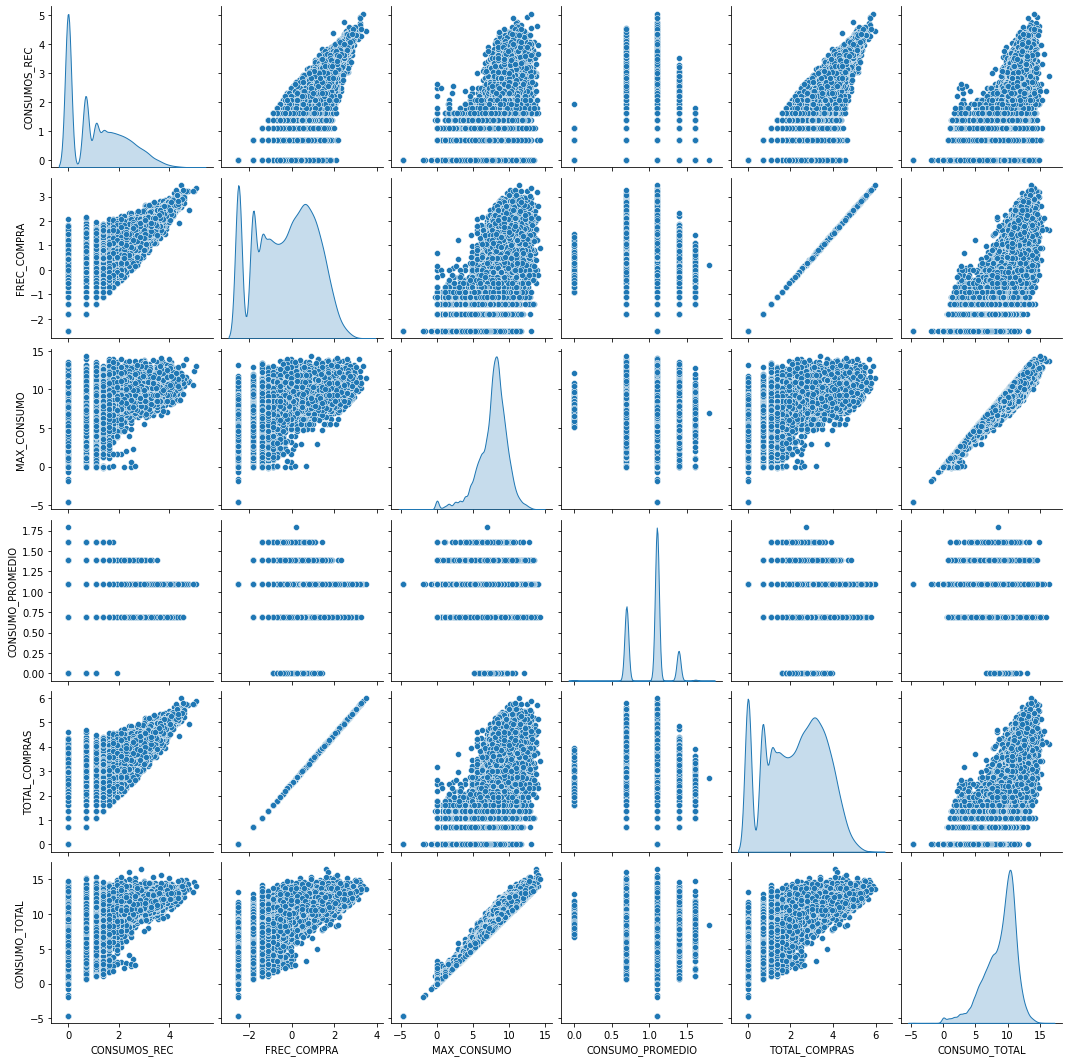

In [62]:
df_clientes_MLlog = np.log(df_clientes_ML)
sns.pairplot(df_clientes_MLlog, diag_kind = 'kde')

In [63]:
from scipy import stats 
def boxcox_df(x): 
    x_boxcox, _ = stats.boxcox(x)
    return x_boxcox

clientes_boxcox = df_clientes_ML.apply(boxcox_df, axis = 0)

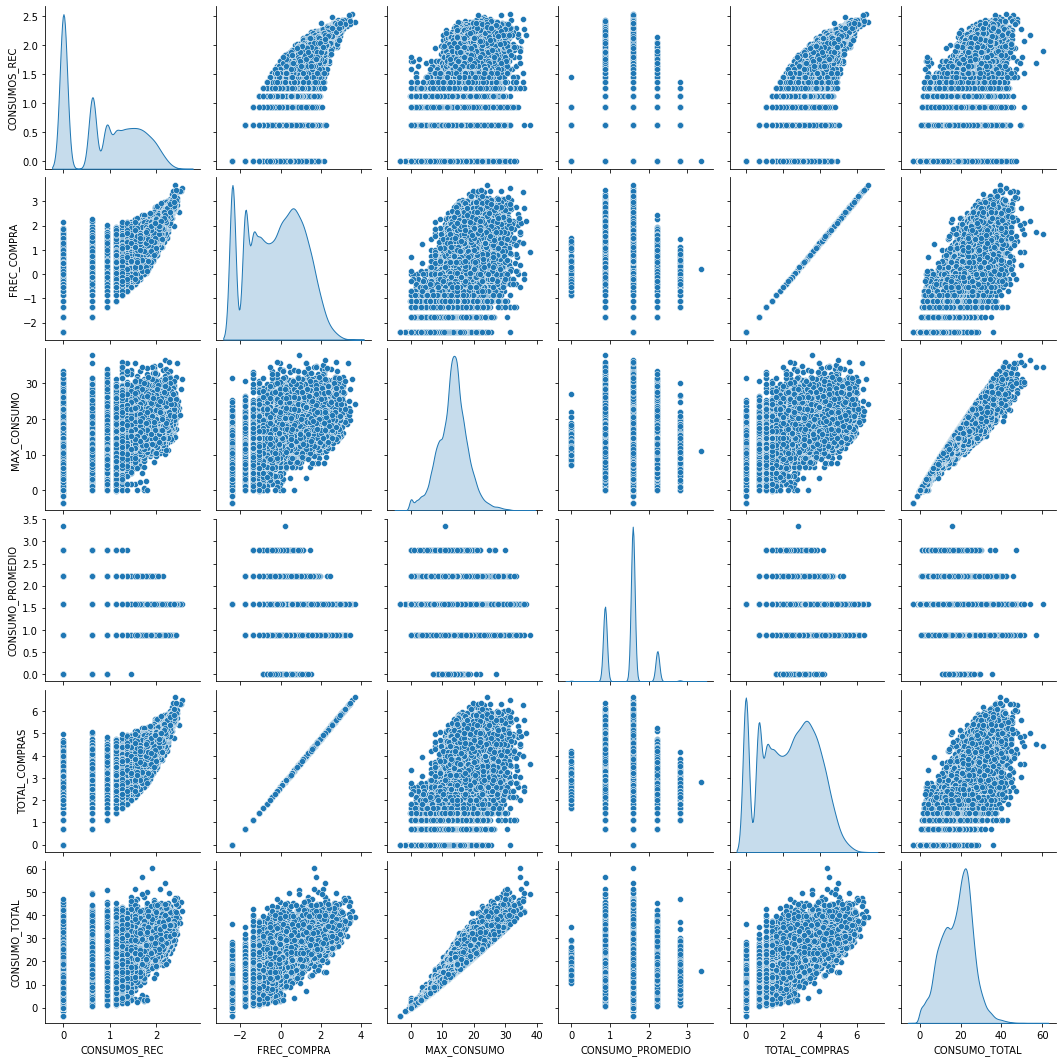

In [64]:
sns.pairplot(clientes_boxcox, diag_kind = 'kde')
plt.show()

In [65]:
scaler = StandardScaler()
scaler.fit(clientes_boxcox)
clientes_escalado = scaler.transform(clientes_boxcox)
clientes_escalado_df = pd.DataFrame(data = clientes_escalado, 
                                   index = clientes_boxcox.index, 
                                   columns = clientes_boxcox.columns)
clientes_escalado_df.agg(['mean', 'std']).round()

,CONSUMOS_REC,FREC_COMPRA,MAX_CONSUMO,CONSUMO_PROMEDIO,TOTAL_COMPRAS,CONSUMO_TOTAL
mean,0.0,0.0,0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0


## Implementación de modelos no supervisados de Machine Learning

### K-Means 

In [66]:
from sklearn.cluster import KMeans
n_clusters = 30
cost = []
for i in range(1, n_clusters):
    kmean = KMeans(i)
    kmean.fit(clientes_escalado_df)
    cost.append(kmean.inertia_)

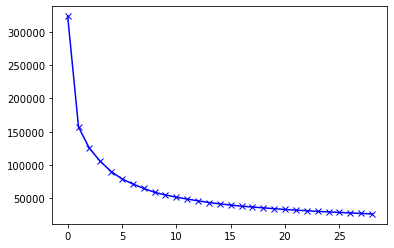

In [67]:
plt.plot(cost, 'bx-')

In [68]:
kmean = KMeans(4)
kmean.fit(clientes_escalado_df)
labels = kmean.labels_

In [69]:
clientes_kmeans4 = df_clientes_ML.assign(segmento = labels)
clientes_kmeans4.head()

,CONSUMOS_REC,FREC_COMPRA,MAX_CONSUMO,CONSUMO_PROMEDIO,TOTAL_COMPRAS,CONSUMO_TOTAL,segmento
CODIGO_CLIENTE,,,,,,,
9338906,2,1.067616,2507.98,2.0,13,10116.03,2
9344014,72,18.149464,143106.91,3.0,221,679009.39,3
9344143,4,0.739118,4889.65,2.0,9,12114.34,2
9246036,1,0.082124,338.28,3.0,1,338.28,1
9253309,4,1.724610,3809.83,2.0,21,21845.04,2


In [70]:
kmeans4_averages = clientes_kmeans4.groupby('segmento').mean().round(0)
print(kmeans4_averages)

          CONSUMOS_REC  FREC_COMPRA  MAX_CONSUMO  CONSUMO_PROMEDIO  \
segmento                                                             
0                  3.0          1.0       6257.0               3.0   
1                  1.0          0.0        518.0               3.0   
2                  3.0          1.0       6767.0               2.0   
3                 14.0          4.0      24928.0               3.0   

          TOTAL_COMPRAS  CONSUMO_TOTAL  
segmento                                
0                   9.0        15865.0  
1                   2.0          664.0  
2                  14.0        21513.0  
3                  48.0       110130.0  


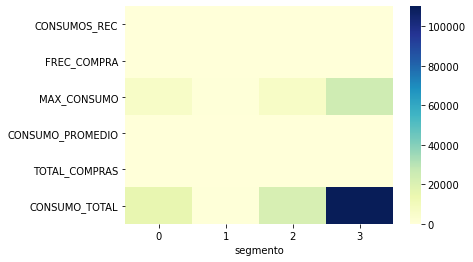

In [71]:
sns.heatmap(kmeans4_averages.T, cmap = 'YlGnBu')
plt.show()

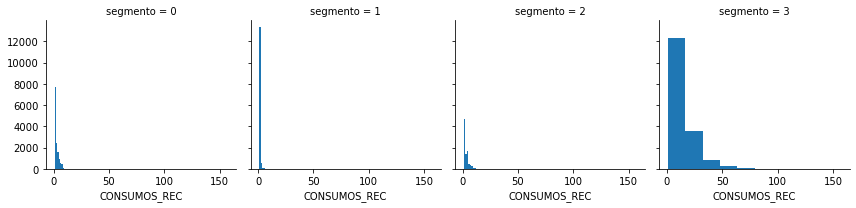

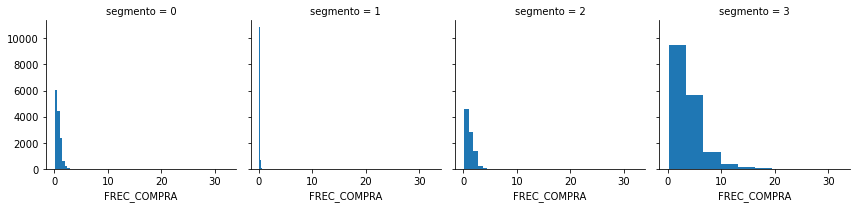

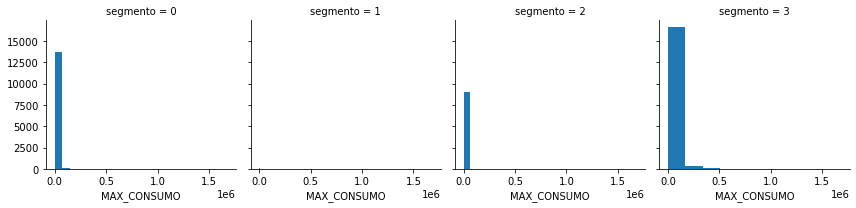

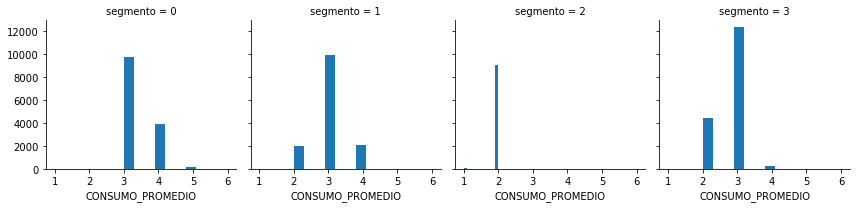

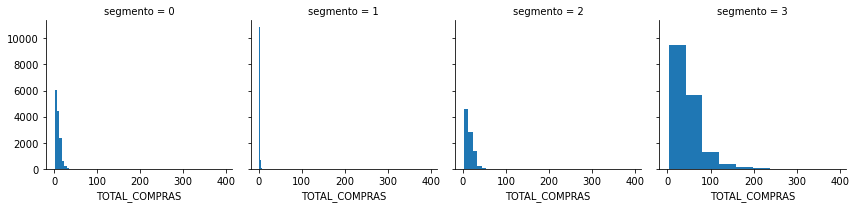

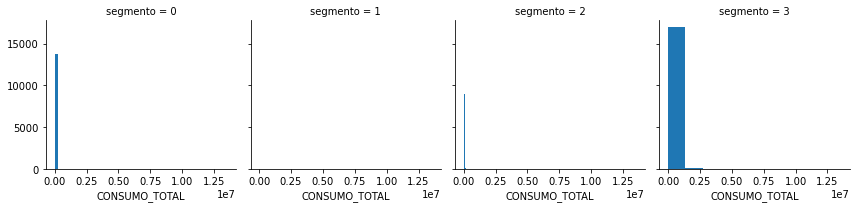

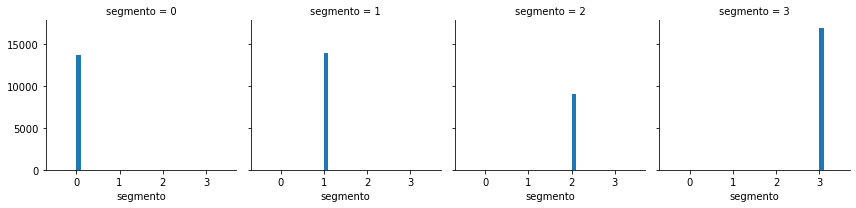

In [72]:
for i in clientes_kmeans4: 
    grid = sns.FacetGrid(clientes_kmeans4, col = 'segmento')
    grid.map(plt.hist, i)

In [73]:
clientes_kmeans4.head()

,CONSUMOS_REC,FREC_COMPRA,MAX_CONSUMO,CONSUMO_PROMEDIO,TOTAL_COMPRAS,CONSUMO_TOTAL,segmento
CODIGO_CLIENTE,,,,,,,
9338906,2,1.067616,2507.98,2.0,13,10116.03,2
9344014,72,18.149464,143106.91,3.0,221,679009.39,3
9344143,4,0.739118,4889.65,2.0,9,12114.34,2
9246036,1,0.082124,338.28,3.0,1,338.28,1
9253309,4,1.724610,3809.83,2.0,21,21845.04,2


In [ ]:
clientes_kmeans4.to_csv('CLIENTES_SEGMENTADOS.csv')

In [ ]:
df_transacciones.to_csv('TRANSACCIONES_FINAL.csv')